## Baseline scores

In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
import xarray as xr
import xskillscore as xs
import skimage
import pandas as pd
import seaborn as sns
import math
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
path = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/nchabloz/Downscaling_CM/dev/NilsCha/utils"
os.chdir(path)
import metrics
import dataset
import rescaling
import results
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
sns.set(style="darkgrid")

In [4]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

### Get the useful files

In [5]:
path = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/HadGEM_driven_COSMO/Present/2003"
os.chdir(path)
filenames = dataset.getfiles()

### Values for an entire day

In [6]:
day_2km = dataset.new_dataset(filenames, 172,173)
path = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/nchabloz/Downscaling_CM/dev/NilsCha/data"
day_2km = day_2km.drop('lon')
day_2km = day_2km.drop('lat')
os.chdir(path)
day_2km

<xarray.Dataset>
Dimensions:     (time: 24, rlon: 1542, rlat: 1542)
Coordinates:
  * time        (time) datetime64[ns] 2003-06-22 ... 2003-06-22T23:00:00
  * rlon        (rlon) float32 -18.86 -18.84 -18.82 -18.8 ... 11.92 11.94 11.96
  * rlat        (rlat) float32 -14.86 -14.84 -14.82 -14.8 ... 15.92 15.94 15.96
    height_2m   float32 2.0
    height_10m  float32 10.0
Data variables:
    T_2M        (time, rlat, rlon) float32 293.9 293.9 293.9 ... 283.5 283.5
    RELHUM_2M   (time, rlat, rlon) float32 79.83 79.32 79.08 ... 79.15 79.35
    TOT_PR      (time, rlat, rlon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    standard_name:  air_temperature
    long_name:      2m temperature
    units:          K
    grid_mapping:   rotated_pole

In [7]:
day_2km.isel(time=0)

<xarray.Dataset>
Dimensions:     (rlon: 1542, rlat: 1542)
Coordinates:
    time        datetime64[ns] 2003-06-22
  * rlon        (rlon) float32 -18.86 -18.84 -18.82 -18.8 ... 11.92 11.94 11.96
  * rlat        (rlat) float32 -14.86 -14.84 -14.82 -14.8 ... 15.92 15.94 15.96
    height_2m   float32 2.0
    height_10m  float32 10.0
Data variables:
    T_2M        (rlat, rlon) float32 293.9 293.9 293.9 ... 284.4 284.4 284.3
    RELHUM_2M   (rlat, rlon) float32 79.83 79.32 79.08 ... 96.67 96.93 97.23
    TOT_PR      (rlat, rlon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:  air_temperature
    long_name:      2m temperature
    units:          K
    grid_mapping:   rotated_pole

In [8]:
np.array(day_2km.T_2M.isel(time = 12))

array([[294.16013, 294.1227 , 294.09567, ..., 309.69763, 309.7135 ,
        309.72546],
       [294.19147, 294.1538 , 294.127  , ..., 309.6592 , 309.68185,
        309.70193],
       [294.22015, 294.18185, 294.1552 , ..., 309.61435, 309.6439 ,
        309.61063],
       ...,
       [283.00903, 283.02707, 283.04742, ..., 286.51202, 286.34897,
        286.2016 ],
       [283.02933, 283.04968, 283.07144, ..., 287.28555, 287.10452,
        286.89224],
       [283.0475 , 283.06952, 283.09204, ..., 287.2334 , 287.15338,
        286.89908]], dtype=float32)

In [9]:
dataset.save_dataset(day_2km, 'day_2km')

saving to  ./day_2km.nc
finished saving


In [42]:
lat_bnd = [-7, 5]
lon_bnd = [-15, -5]

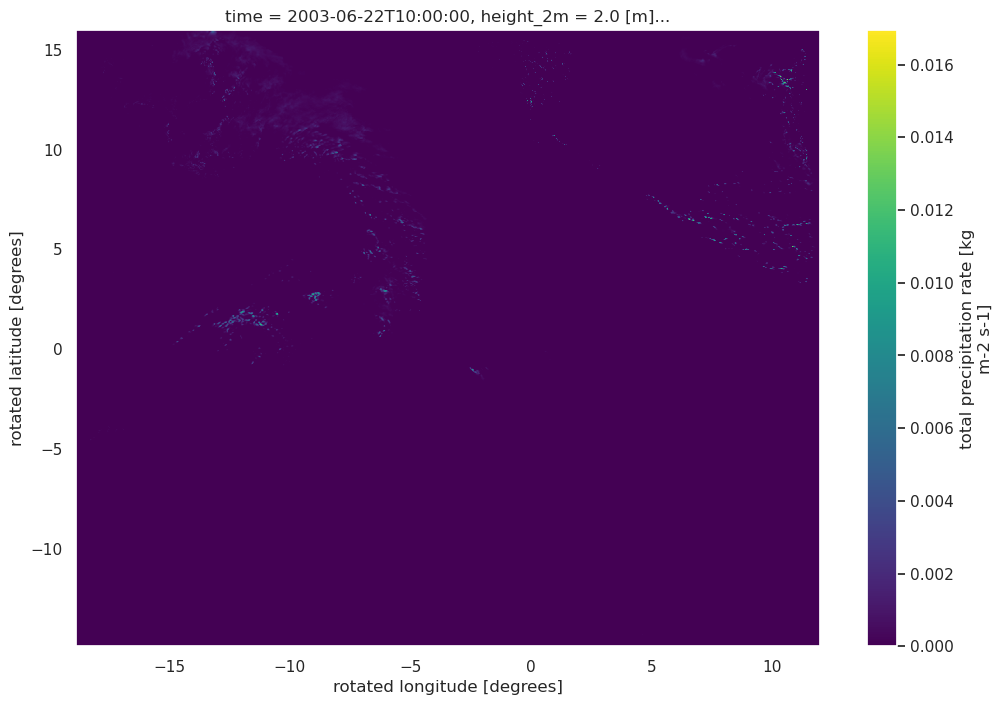

In [11]:
day_2km.TOT_PR.isel(time = 10).plot()

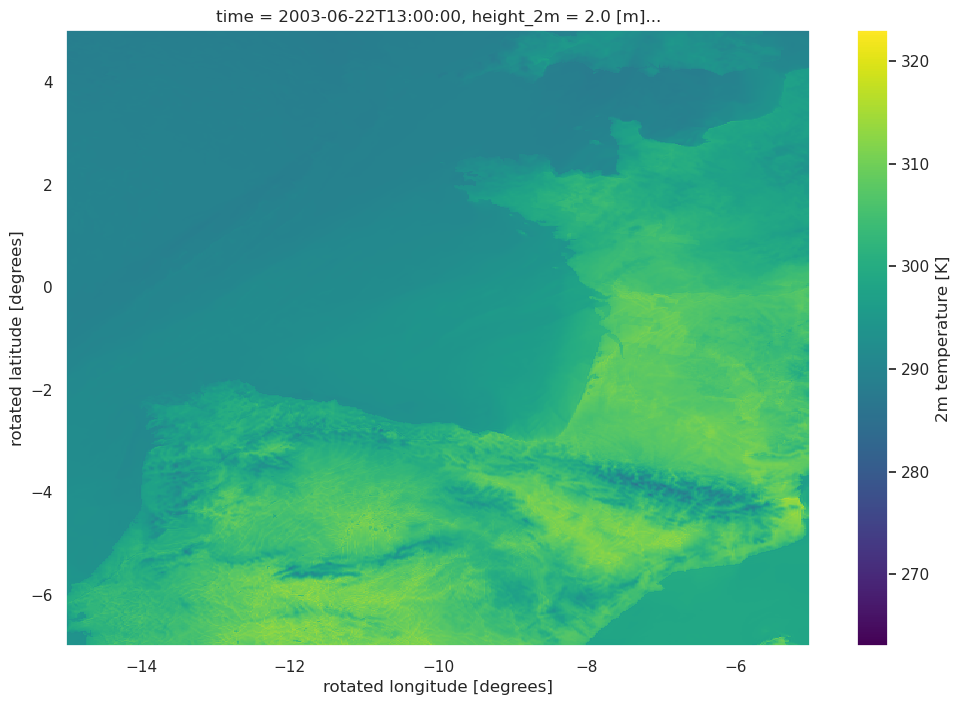

In [12]:
day_2km.T_2M.sel(rlon=slice(*lon_bnd), rlat=slice(*lat_bnd)).isel(time = 13).plot(vmin = 263, vmax = 323)

### Future value

In [13]:
path = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/HadGEM_driven_COSMO/Future/2083"
os.chdir(path)
filenames = dataset.getfiles()

In [14]:
future_day_2km = dataset.new_dataset(filenames, 172, 173)
path = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/nchabloz/Downscaling_CM/dev/NilsCha/data"
future_day_2km = future_day_2km.drop('lon')
future_day_2km = future_day_2km.drop('lat')
os.chdir(path)
future_day_2km

<xarray.Dataset>
Dimensions:     (time: 24, rlon: 1542, rlat: 1542)
Coordinates:
  * time        (time) datetime64[ns] 2083-06-22 ... 2083-06-22T23:00:00
  * rlon        (rlon) float32 -18.86 -18.84 -18.82 -18.8 ... 11.92 11.94 11.96
  * rlat        (rlat) float32 -14.86 -14.84 -14.82 -14.8 ... 15.92 15.94 15.96
    height_2m   float32 2.0
    height_10m  float32 10.0
Data variables:
    T_2M        (time, rlat, rlon) float32 296.1 296.1 296.1 ... 287.5 287.5
    RELHUM_2M   (time, rlat, rlon) float32 83.4 82.48 81.84 ... 86.36 86.82
    TOT_PR      (time, rlat, rlon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    standard_name:  air_temperature
    long_name:      2m temperature
    units:          K
    grid_mapping:   rotated_pole

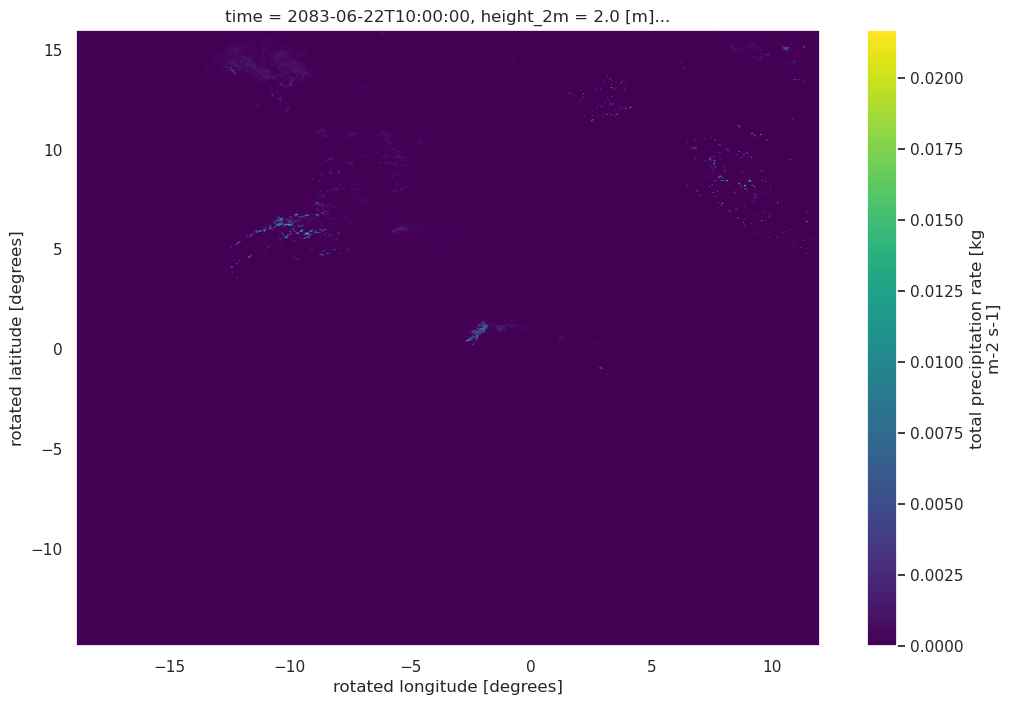

In [15]:
future_day_2km.TOT_PR.isel(time = 10).plot()

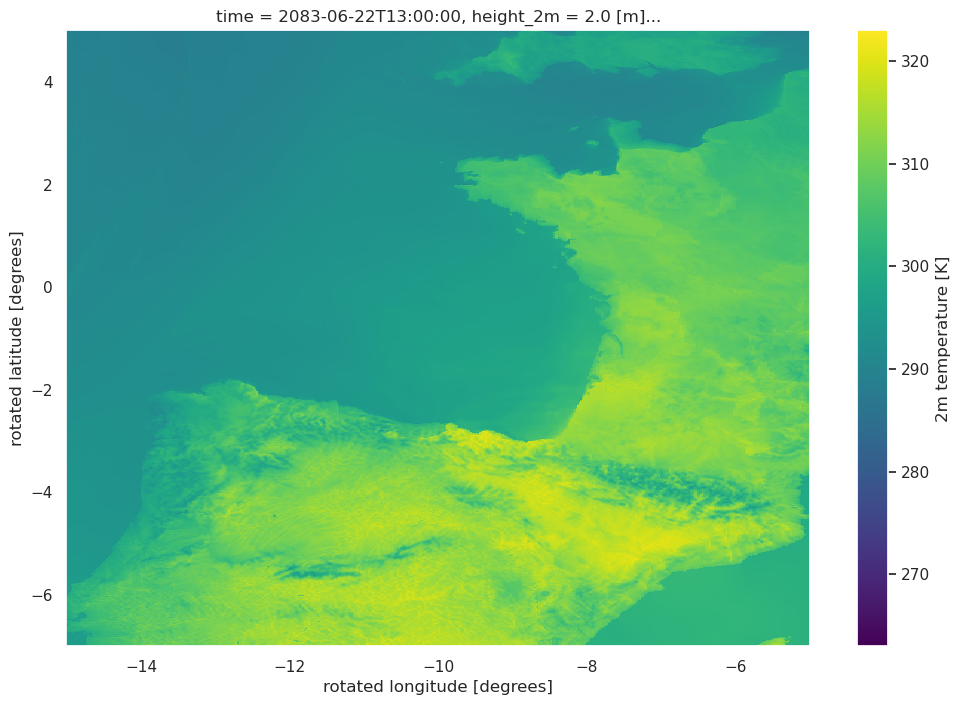

In [16]:
future_day_2km.T_2M.sel(rlon=slice(*lon_bnd), rlat=slice(*lat_bnd)).isel(time = 13).plot(vmin = 263, vmax = 323)

## Data preparation
### Upscaling

In [17]:
ingrid = rescaling.create_grid(-18.86, 11.98, 0.02, -14.86, 15.98, 0.02)
outgrid = rescaling.create_grid(-18.86, 11.9, 0.12, -14.86, 15.9, 0.12)

In [18]:
ups_ds = rescaling.upscale(day_2km, ingrid, outgrid)

/users/nchabloz/work/FAC/FGSE/IDYST/tbeucler/downscaling/nchabloz/miniconda3/conda/lib/python3.10/site-packages/xesmf/frontend.py:597: UserWarning: Using dimensions ('rlat', 'rlon') from data variable T_2M as the horizontal dimensions for the regridding.
  warnings.warn(


In [19]:
ups_ds_f = rescaling.upscale(future_day_2km, ingrid, outgrid)

/users/nchabloz/work/FAC/FGSE/IDYST/tbeucler/downscaling/nchabloz/miniconda3/conda/lib/python3.10/site-packages/xesmf/frontend.py:597: UserWarning: Using dimensions ('rlat', 'rlon') from data variable T_2M as the horizontal dimensions for the regridding.
  warnings.warn(


saving to  ./day_12km.nc
finished saving


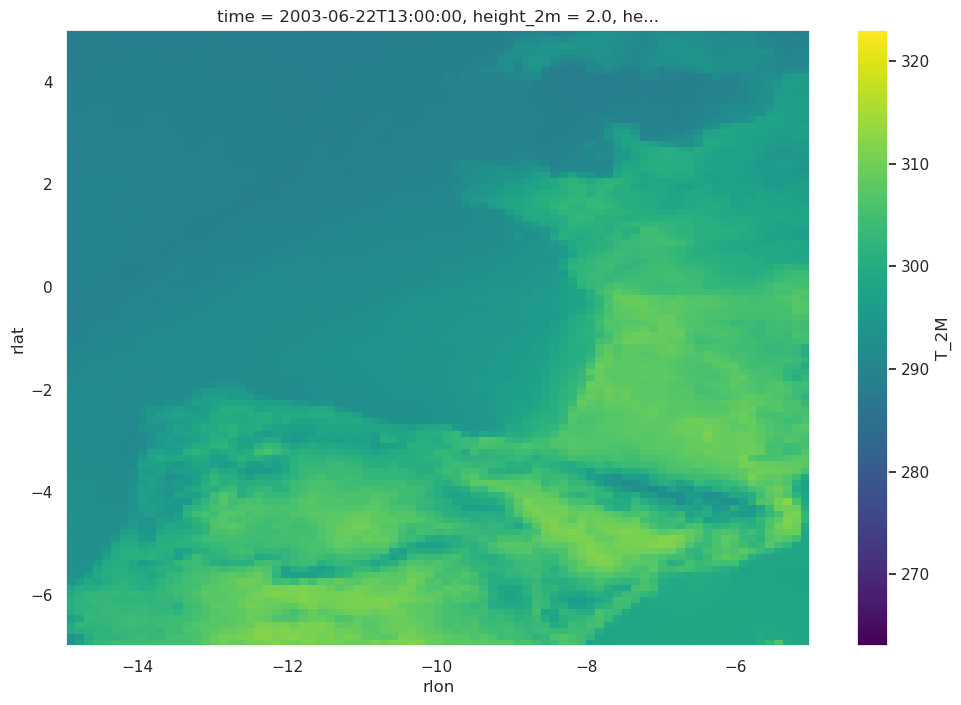

In [20]:
ups_ds.T_2M.sel(rlon=slice(*lon_bnd), rlat=slice(*lat_bnd)).isel(time = 13).plot(vmin = 263, vmax = 323)
dataset.save_dataset(ups_ds, 'day_12km')

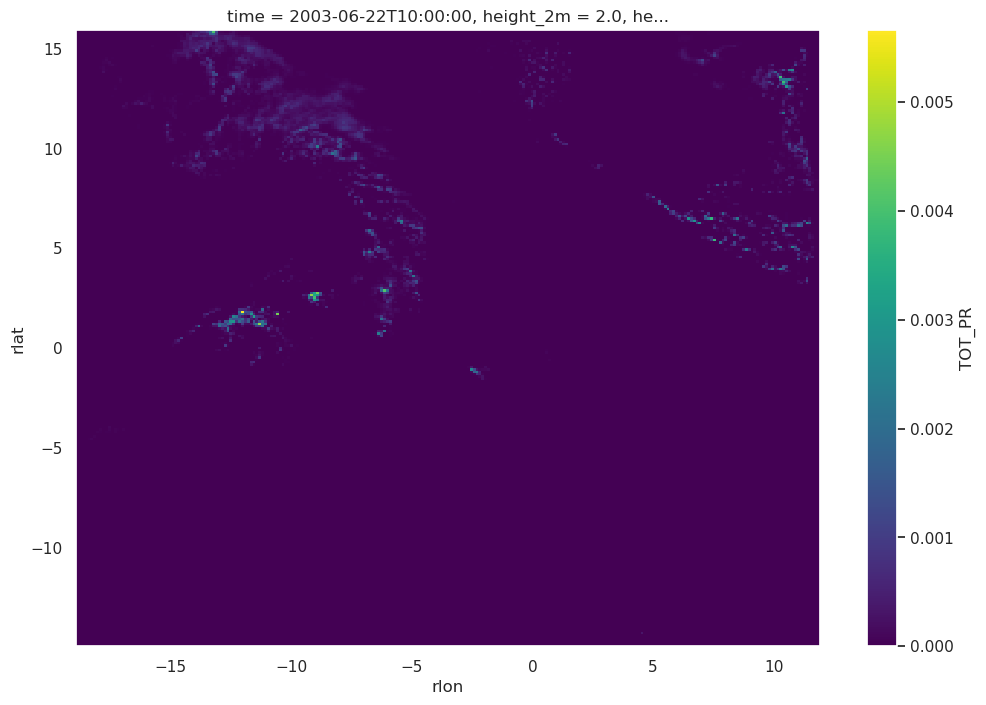

In [21]:
ups_ds.TOT_PR.isel(time=10).plot()

### Downscalling
bilinear remapping, bicubic and quintic

In [22]:
bilin_2km = xr.full_like(day_2km, 0)
rescaling.downscale(ups_ds, bilin_2km, -18.86, 11.9, -14.86, 15.9, 11.98, 15.98, 0.12, 0.02, 'linear')

<xarray.Dataset>
Dimensions:     (time: 24, rlat: 1542, rlon: 1542)
Coordinates:
  * time        (time) datetime64[ns] 2003-06-22 ... 2003-06-22T23:00:00
  * rlon        (rlon) float32 -18.86 -18.84 -18.82 -18.8 ... 11.92 11.94 11.96
  * rlat        (rlat) float32 -14.86 -14.84 -14.82 -14.8 ... 15.92 15.94 15.96
    height_10m  float32 10.0
    height_2m   float32 2.0
Data variables:
    T_2M        (time, rlat, rlon) float32 293.9 293.9 293.9 ... 283.8 283.8
    RELHUM_2M   (time, rlat, rlon) float32 79.63 79.99 80.35 ... 78.44 78.44
    TOT_PR      (time, rlat, rlon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    standard_name:  air_temperature
    long_name:      2m temperature
    units:          K
    grid_mapping:   rotated_pole

In [30]:
bilin_2km_f = xr.full_like(future_day_2km, 0)
rescaling.downscale(ups_ds_f, bilin_2km_f, -18.86, 11.9, -14.86, 15.9, 11.98, 15.98, 0.12, 0.02, 'linear')

<xarray.Dataset>
Dimensions:     (time: 24, rlat: 1542, rlon: 1542)
Coordinates:
  * time        (time) datetime64[ns] 2083-06-22 ... 2083-06-22T23:00:00
  * rlon        (rlon) float32 -18.86 -18.84 -18.82 -18.8 ... 11.92 11.94 11.96
  * rlat        (rlat) float32 -14.86 -14.84 -14.82 -14.8 ... 15.92 15.94 15.96
    height_10m  float32 10.0
    height_2m   float32 2.0
Data variables:
    T_2M        (time, rlat, rlon) float32 296.0 296.0 296.0 ... 287.7 287.7
    RELHUM_2M   (time, rlat, rlon) float32 83.02 82.78 82.54 ... 86.11 86.11
    TOT_PR      (time, rlat, rlon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    standard_name:  air_temperature
    long_name:      2m temperature
    units:          K
    grid_mapping:   rotated_pole

saving to  ./bilin_day.nc
finished saving


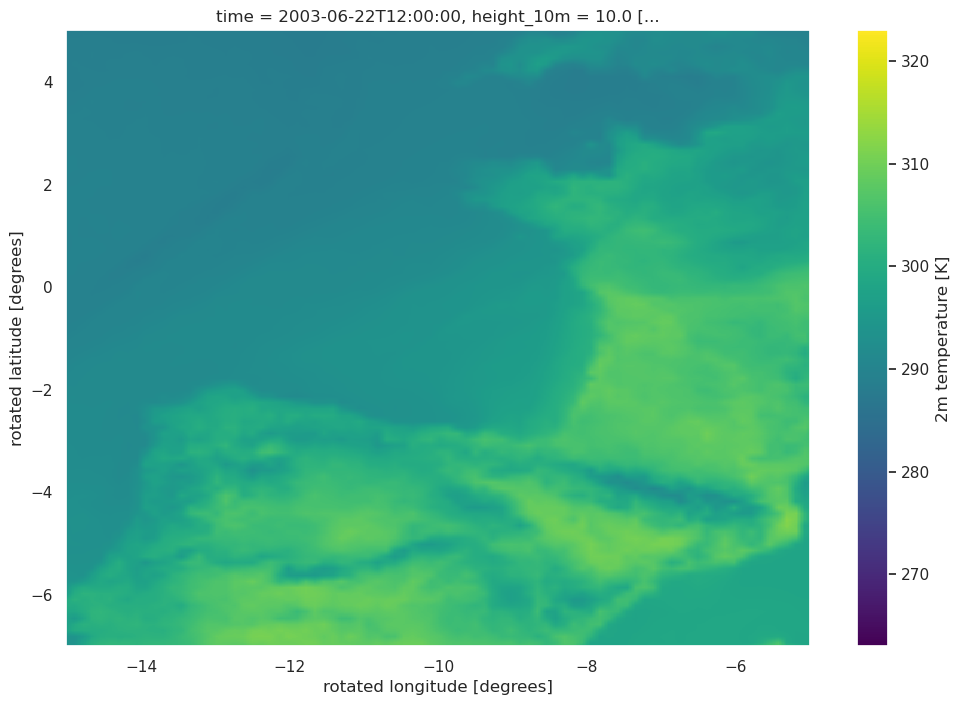

In [31]:
dataset.save_dataset(bilin_2km, 'bilin_day')
bilin_2km.T_2M.sel(rlon=slice(*lon_bnd), rlat=slice(*lat_bnd)).isel(time = 12).plot(vmin = 263, vmax = 323)

In [43]:
bicubic_2km = xr.full_like(day_2km, 0)
rescaling.downscale(ups_ds, bilin_2km, -18.86, 11.9, -14.86, 15.9, 11.98, 15.98, 0.12, 0.02, 'cubic')
dataset.save_dataset(bicubic_2km, 'bicubic_day')

saving to  ./bicubic_day.nc
finished saving


In [35]:
bicubic_2km_f = xr.full_like(future_day_2km, 0)
rescaling.downscale(ups_ds_f, bilin_2km_f, -18.86, 11.9, -14.86, 15.9, 11.98, 15.98, 0.12, 0.02, 'cubic')

<xarray.Dataset>
Dimensions:     (time: 24, rlat: 1542, rlon: 1542)
Coordinates:
  * time        (time) datetime64[ns] 2083-06-22 ... 2083-06-22T23:00:00
  * rlon        (rlon) float32 -18.86 -18.84 -18.82 -18.8 ... 11.92 11.94 11.96
  * rlat        (rlat) float32 -14.86 -14.84 -14.82 -14.8 ... 15.92 15.94 15.96
    height_10m  float32 10.0
    height_2m   float32 2.0
Data variables:
    T_2M        (time, rlat, rlon) float32 296.0 296.0 296.0 ... 287.7 287.7
    RELHUM_2M   (time, rlat, rlon) float32 83.02 82.47 82.06 ... 86.11 86.11
    TOT_PR      (time, rlat, rlon) float32 -1.478e-36 2.642e-34 ... 0.0 0.0
Attributes:
    standard_name:  air_temperature
    long_name:      2m temperature
    units:          K
    grid_mapping:   rotated_pole

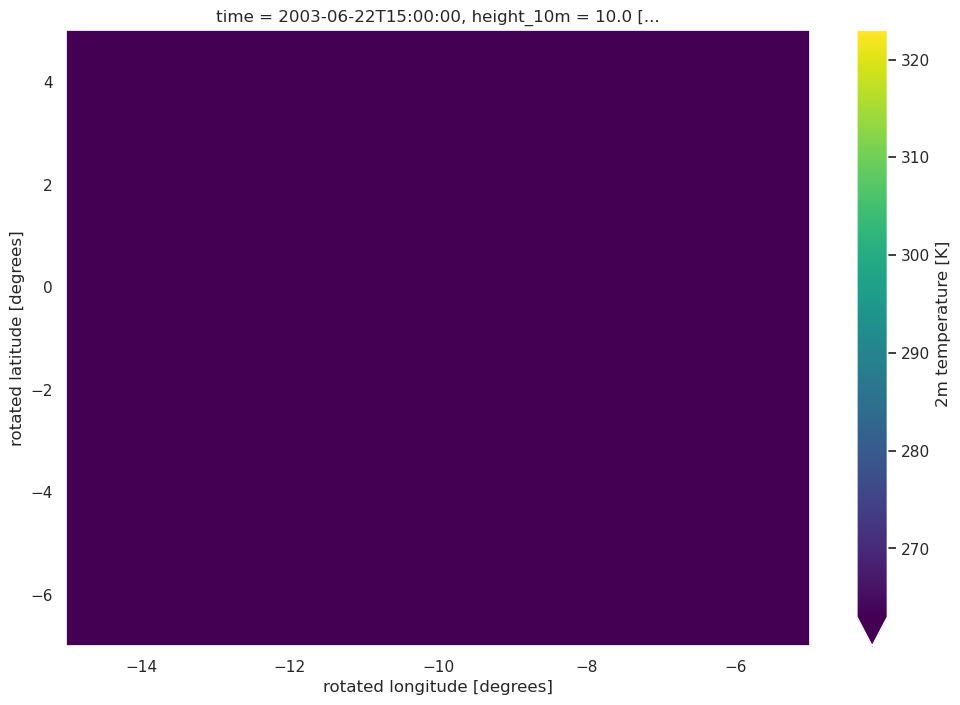

In [44]:
bicubic_2km.T_2M.sel(rlon=slice(*lon_bnd), rlat=slice(*lat_bnd)).isel(time = 15).plot(vmin = 263, vmax = 323)